#経済・ファイナンスデータの計量時系列分析　
#第6章　見せかけの回帰と共和分

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as random
import statsmodels.formula.api as smf
import statsmodels.tsa.api as tsa
%matplotlib inline

###ランダムウォーク（単位根過程）で回帰分析してみる
パラメータ推定するモデル：$y_t=\alpha+\beta x_t $

$x_t,y_t:$独立に生成されたランダムウォーク

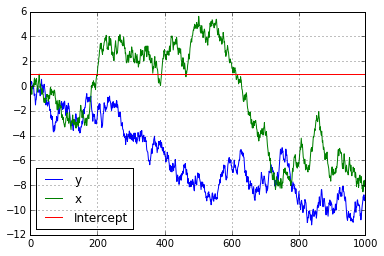

In [2]:
def gen_random_walk(num, start,amp):
    df=pd.Series([])
    for i in range(num):
        if i  == 0 :
            df[i] = start
        else:
            df[i] = df[i-1]+(random.random()-0.5)*amp
    return df

## ランダムウォークを2系列生成
data=pd.DataFrame([])
data["y"]=gen_random_walk(1000,0,1)
data["x"]=gen_random_walk(1000,0,1)
data["Intercept"]=1 # 切片
data.plot()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     167.2
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           1.78e-35
Time:                        00:13:58   Log-Likelihood:                -2462.9
No. Observations:                1000   AIC:                             4930.
Df Residuals:                     998   BIC:                             4940.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              0.2854      0.022     12.931      0.000         0.242     0.329
Intercept     -5.6261      0.093    -60.392      0.000        -5.809    -5.443
==============================================================================
Omnibus:                      182.271   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.486
Skew:                           0.392   Prob(JB):                     2.70e-14
Kurtosis:                       2.060   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

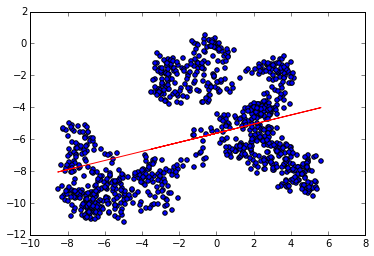

In [3]:
model = smf.OLS(data["y"], data[["x","Intercept"]])
results = model.fit()

plt.scatter(data["x"],data["y"])
plt.plot(data["x"],data["x"]*results.params["x"]+results.params["Intercept"],color="red")

results.summary()

In [4]:
##ADF検定
print tsa.adfuller(data["x"])   ##p値（2番目の数値）が大きい→帰無仮説（Xが単位根過程であること）は棄却されない
##Engle-Granger共和分検定（残差が単位根過程かどうかの検定）
print tsa.adfuller(results.resid) ##p値（2番目の数値）が大きい→帰無仮説（残差が単位根過程であること）は棄却されない

(-0.66410351343305618, 0.8558297690552914, 6, 993, {'5%': -2.8644550095200705, '1%': -3.4369525024039884, '10%': -2.568322093455802}, 347.10978991171874)
(-2.2186275434500562, 0.19955432794343286, 0, 999, {'5%': -2.864437475834273, '1%': -3.4369127451400474, '10%': -2.568312754566378}, 411.92545085442202)


###$y_tとx_tの差分系列を取得し、回帰分析してみる$

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.290
Date:                Mon, 03 Aug 2015   Prob (F-statistic):              0.131
Time:                        00:13:58   Log-Likelihood:                -157.42
No. Observations:                1000   AIC:                             318.8
Df Residuals:                     998   BIC:                             328.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
delta_x       -0.0470      0.031     -1.513      0.131        -0.108     0.014
Intercept     -0.0096      0.009     -1.068      0.286        -0.027     0.008
==============================================================================
Omnibus:                      787.648   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.925
Skew:                           0.021   Prob(JB):                     5.89e-14
Kurtosis:                       1.791   Cond. No.                         3.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

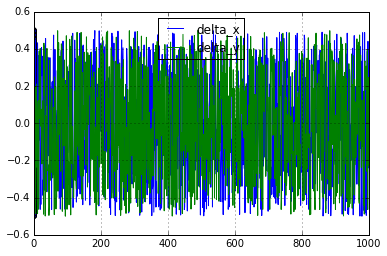

In [5]:
## 差分系列(delta_x, delta_y)を取得
data["delta_x"]=(data["x"]-data["x"].shift(1)).fillna(0)
data["delta_y"]=(data["y"]-data["y"].shift(1)).fillna(0)
data[["delta_x","delta_y"]].plot()

model = smf.OLS(data["delta_y"], data[["delta_x","Intercept"]])
results = model.fit()

plt.scatter(data["delta_x"],data["delta_y"])
plt.plot(data["delta_x"],data["delta_x"]*results.params["delta_x"]+results.params["Intercept"],color="red")

results.summary()

In [6]:
##ADF検定
print tsa.adfuller(data["delta_x"])   ##p値（2番目の数値）が小さい→帰無仮説（単位根過程であること）は棄却される
##Engle-Granger共和分検定（残差が単位根過程かどうかの検定）
print tsa.adfuller(results.resid) ##p値（2番目の数値）が小さい→帰無仮説（残差が単位根過程であること）は棄却される

(-12.253775811192416, 9.4106901728021988e-23, 5, 994, {'5%': -2.8644520725172873, '1%': -3.4369458427754398, '10%': -2.5683205291305176}, 345.53082310492505)
(-32.438015619230377, 0.0, 0, 999, {'5%': -2.864437475834273, '1%': -3.4369127451400474, '10%': -2.568312754566378}, 313.92966726758209)


##見せかけの回帰(spurious regression)
単位根過程$y_t$を定数と$y_t$と関係のない単位根過程$x_t$に回帰すると、$x_tとy_t$との間に有意な関係があり、回帰の説明力が高いようにみえる現象は$\bf{見せかけの回帰}$といわれる

$y_t=\alpha+\beta x_t $　($x_t,y_t$:独立に生成されたランダムウォーク)
というモデルのOLS推定量$\hat{\alpha}、\hat{\beta}$は以下のように表される。

$\left(
\begin{array}{c}
T^{-1/2}\hat{\alpha}\\
\hat{\beta}
\end{array}
\right)
=
\left(
\begin{array}{c}
\sigma_1h_1\\
(\sigma_1/\sigma_2)h_2
\end{array}
\right)
$

* $\hat{\alpha}$：$\sqrt{T}$の速度で発散　
* $\hat{\beta}$：ある確率変数に収束　→　0ではないこともある（2系列間に有意な関係が存在しうる）

また、標本数を増やすと、漸近的に決定係数$R^2$が1に収束することが知られている


###見せかけの回帰を回避する方法
#### 1.(少なくともどちらか一方の)ラグ変数を回帰に含める
$y_t=\alpha+\beta_1 x_t+\epsilon_t$

でなく

$y_t=\alpha+\beta_1x_t+\beta_2x_{t-1}+\beta_3y_{t-1}+\epsilon_t$

とする

#### 2.差分をとってから回帰する
$y_t=\alpha+\beta x_t $

でなく

$\Delta y_t=\alpha + \beta \Delta x_t+\epsilon_t$

とする

※差分をとるまえに、単位根過程であるかの検定（ADF検定）、共和分でないかの検定（Engle-Granger共和分検定）を行う必要がある

* 定常過程＋定常過程＝定常過程
* 定常過程＋単位根過程＝単位根過程
* 単位根過程＋単位根過程＝単位根過程or${\bf 定常過程（共和分）}$

##共和分(cointegration)
${\bf y}_t$をI(0)過程とする。${\bf a}'{\bf y}_t$がI(0)過程(定常過程)となるような${\bf a}$が存在するとき、${\bf y}_t$には共和分の関係がある、もしくは${\bf y}_t$は共和分しているといわれる。また、このとき、${\bf a}$は共和分ベクトルとよばれる。

共和分の関係がある→長期的に見て、時系列データ間に（見せかけでない）関係性がある

##Granger表現定理
共和分を含んだVARモデルがベクトル誤差修正モデル（VECM）で表現できることを、Granger表現定理という。


以下の共和分システムを考える。$y_{1t},y_{2t}$ともにI(1)系列。

$\begin{cases}
y_{1t}=\gamma y_{2t}+u_{1t},     u_{1t} \sim W.N.(\sigma_1^2)\\
y_{2t}=y_{2,t-1}+u_{2t},     u_{2t} \sim W.N.(\sigma_2^2)
\end{cases}$

このシステムはVAR表現ができる

$\left(
\begin{array}{c}
y_{1t}\\
y_{2t}
\end{array}
\right)
=
\left(
\begin{array}{cc}
0 & \gamma \\
0 & 1
\end{array}
\right)
\left(
\begin{array}{c}
y_{1,t-1}\\
y_{2,t-1}
\end{array}
\right)
+
\left(
\begin{array}{c}
\epsilon_{1,t}\\
\epsilon_{2,t}
\end{array}
\right)$

ただし、$\left(
\begin{array}{c}
\epsilon_{1t}\\
\epsilon_{2t}
\end{array}
\right)
=
\left(
\begin{array}{c}
u_{1t}+\gamma u_{1t}\\
u_{2t}
\end{array}
\right)$

VAR特性方程式$|{\bf I}_2-{\bf \Phi}_1z|$が解$z=1$をもつため、これは単位根VAR過程である

→そのままでは分析しづらいので、差分系列をとってから分析する

差分系列のVMA表現は以下のとおり

$\left(
\begin{array}{c}
\Delta y_{1t}\\
\Delta y_{2t}
\end{array}
\right)
=
\left(
\begin{array}{c}
\epsilon _{1t}\\
\epsilon _{2t}
\end{array}
\right)
+
\left(
\begin{array}{cc}
-1 & \gamma \\
0 & 0
\end{array}
\right)
\left(
\begin{array}{c}
\epsilon _{1,t-1}\\
\epsilon _{2,t-1}
\end{array}
\right)
$

VMA特性方程式$|{\bf I}_2+{\bf \Psi}_1z|$が解$z=1$をもつため、これは単位根VMA過程であり、反転不可能（VAR表現ができない）

→この共和分システムの差分系列にVAR系列を当てはめようとすると、誤ったモデルとなるので、NG


###ベクトル誤差修正モデル(VECM)
この共和分システムの差分系列に対する正しい表現（＝ベクトル誤差修正モデル）は以下のとおり

$\Delta {\bf y}_t
=-
\left(
\begin{array}{c}
1\\ 
0
\end{array}
\right)
\left(
\begin{array}{cc}
1&-\gamma
\end{array}
\right)
{\bf y}_{t-1}
+\epsilon _t
=-{\bf b}{\bf a}'{\bf y}_{t-1}+\epsilon _t
$


${\bf a}'{\bf y}_{t-1}$：共和分関係を表す（定常である）項

${\bf b}$：均衡からの解離に対する調整速度と調整の方向を表すパラメータ

$-{\bf b}{\bf a}'{\bf y}_{t-1}$：誤差修正項


VECMは定常過程である



<img src="VECM.png" alt="Drawing">
参考： http://www.geocities.jp/tatsuyoshi_okimoto/lecture/ftsa10/cointegration.pdf

##共和分関係の推定
共和分関係の推定（＝共和分ベクトルの推定）を考える。

####（方法1）OLS回帰→残差をADF検定し、単位根過程でなければ、共和分関係が推定されたことになる

※注意：OLS回帰では1つのベクトルしか得られないので、推定された共和分ベクトルが期待していたものであるとは限らない


####（方法2）VECMに基づいた最尤法（Johansenの方法）

システムがh個の共和分関係をもつことを仮定し、VECMにもとづいて複数の共和分関係を同時に推定する


####正準相関分析
参考：http://homepage3.nifty.com/ogasawara-labo/hanbetsubunseki.pdf


##共和分の検定
複数の単位根過程の間に、共和分関係があるかどうかの検定

####共和分ベクトルが既知の場合
実データを既知の関係にあてはめ、残差に対して単位根検定を行う

####共和分ベクトルが1つで未知の場合
Engle-Granger共和分検定（OLS回帰→残差を単位根検定）

※通常の単位根検定から棄却点を変更する必要がある。また、定数を含むかどうか、トレンドを含むかどうか等で、複数の場合を考える必要がある

####その他（共和分ベクトルが複数で未知の場合）の場合
VECMに基づいた検定を行う
 * レース検定
 * 最大固有値検定



###RでJohansenの方法をやってみる
参考URL：http://itbc-world.com/home/rfm/rの統計関数/共和分分析/

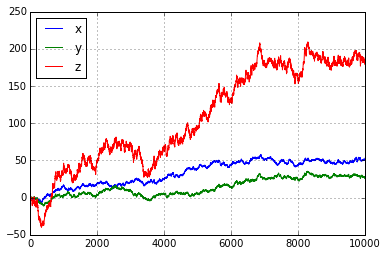

In [13]:
data2=pd.DataFrame([])
data2["x"]=gen_random_walk(10000,0,1)
data2["y"]=gen_random_walk(10000,0,1)
data2["z"]=data2["x"]*2+data2["y"]*3+(random.random()-0.5)
# 2x+3y=z
data2.plot()

In [15]:
import pandas.rpy.common as com
import rpy2.robjects as robjects

rdata2 = com.convert_to_r_dataframe(data2)
# Python 上の rdataを R の名前空間に渡す
robjects.r.assign('rdata2', rdata2);

# R 上でコマンド実行
robjects.r('print(rdata2)')

                x            y            z
0               0            0 -0.27051....
1    -0.31408.... -0.09586.... -1.18626....
2    -0.76906.... 0.391938.... -0.63282....
3    -0.74058.... 0.207052.... -1.13051....
4    -1.22595.... 0.548934.... -1.07561....
5    -1.07410.... 0.092550.... -2.14106....
6    -0.94675.... -0.05782.... -2.33750....
7    -1.09729.... -0.00817.... -2.48961....
8    -1.03417.... 0.053776.... -2.17753....
9    -0.74015.... 0.378308.... -0.61589....
10   -0.36130.... -0.02984.... -1.08264....
11   -0.15536.... -0.43223.... -1.87793....
12   -0.03118.... -0.34663.... -1.37278....
13   0.108040.... -0.01326.... -0.09423....
14   0.528478.... -0.08943.... 0.518133....
15   0.075902.... -0.11933.... -0.47669....
16   -0.16512.... 0.067226.... -0.39908....
17   0.291494.... -0.37059.... -0.79931....
18   0.126864.... 0.001268.... -0.01297....
19   0.269056.... 0.150006.... 0.717622....
20   0.257013.... -0.20672.... -0.37666....
21   -0.02781.... 0.026095.... -

<DataFrame - Python:0x10b9e8a70 / R:0x107fd0050>
[FloatVector, FloatVector, FloatVector]
  x: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x1039737e8 / R:0x10a75a600>
[0.000000, -0.314081, -0.769065, ..., 52.914488, 53.360070, 53.134788]
  y: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x10b8b9c20 / R:0x10a76e000>
[0.000000, -0.095865, 0.391939, ..., 26.436830, 26.195931, 26.445218]
  z: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x10e605248 / R:0x10a781a00>
[-0.270511, -1.186267, -0.632825, ..., 184.868956, 185.037423, 185.334718]

In [19]:
# ライブラリ読み込み
robjects.r('library(urca)');

# Johansenの方法
robjects.r('result_eigen <- ca.jo( rdata2, ecdet = "none", type = "eigen",K = 2, spec = "longrun" )');
robjects.r('result_trace <- ca.jo( rdata2, ecdet = "none", type = "trace",K = 2, spec = "longrun" )');
# ecdet: 切片あり/なし、トレンドあり/なし
# type: eigen (最大固有値検定)　or trace（トレース検定）
# K ：ラグ数
# spec：longrun VECM or transitory  VECM 
# season
print "################################  最大固有値検定 ################################  " 
print(robjects.r('summary(result_eigen)'))
print "################################  トレース検定 ###################################  "
print(robjects.r('summary(result_trace)'))

################################  最大固有値検定 ################################  

###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.0015952895 0.0009230802 0.0002379846

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  2.38  6.50  8.18 11.65
r <= 1 |  9.23 12.91 14.90 19.19
r = 0  | 15.96 18.90 21.07 25.75

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           x.l2       y.l2       z.l2
x.l2  1.0000000  1.0000000  1.0000000
y.l2  1.4997458  1.5010484  1.4995657
z.l2 -0.4999587 -0.5001762 -0.4996353

Weights W:
(This is the loading matrix)

          x.l2      y.l2        z.l2
x.d -0.1598029  0.389585 -0.22780476
y.d  2.2254025 -2.182053 -0.02954632
z.d  6.3474121 -5.770805 -0.54425415


################################  トレース検定 ###################################  

##############

##まとめ
<img src="matome.jpg" alt="Drawing">